In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
merged_table = pd.read_csv('merged_table', parse_dates = ['invoice_datetime'])

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
merged_table.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554417 entries, 0 to 554416
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   invoice_no        554417 non-null  object        
 1   product_id        554417 non-null  object        
 2   quantity          554417 non-null  int64         
 3   unit_price        554417 non-null  float64       
 4   total_sale        554417 non-null  float64       
 5   customer_id       554417 non-null  object        
 6   rating            554417 non-null  float64       
 7   review_count      554417 non-null  int64         
 8   country           554417 non-null  object        
 9   product_name      554417 non-null  object        
 10  product_type      554417 non-null  object        
 11  stock_code        554417 non-null  object        
 12  invoice_datetime  554417 non-null  datetime64[ns]
 13  day_of_week       554417 non-null  int64         
 14  mont

In [4]:
merged_table.head(2)

,invoice_no,product_id,quantity,unit_price,total_sale,customer_id,rating,review_count,country,product_name,product_type,stock_code,invoice_datetime,day_of_week,month,hour,year,quarter,invoice_date
0,78536597,B07GWKDLGT,4,496.95,1987.80,18011,4.6,1399,Germany,Nikon D3500 W/ AF-P DX NIKKOR 18-55mm f/3.5-5....,dslr camera,21703,2018-12-01 17:00:00,5,12,17,2018,4,2018-12-01
1,78536597,B01MTLH408,4,39.99,159.96,18011,4.6,289,Germany,"Manfrotto Element Aluminum 5-Section Monopod, ...",dslr camera,40001,2018-12-01 17:00:00,5,12,17,2018,4,2018-12-01


<h3> Function for computing returning customer rate </h3>

In [5]:
def returning_customer_rate(time_period):
    """
    Compute returning customer rate

    Arguments:
    
    time_period -- (start_date ('yyyy-mm-dd'), end_date('yyyy-mm-dd'))

    Returns:

    more_than_one, at_least_one, more_than_one/at_least_one 
    (# customers making more than one order, # customers making at least one order, ratio between the two)

    
    """

    start_date, end_date = time_period
    
    # slice dataframe within time_period
    df_slice = merged_table[(merged_table['invoice_date']>=start_date) & (merged_table['invoice_date']<=end_date)]
    
    # for each customer_id, count number of unique orders (invoice_no)
    df_slice_agg = df_slice.groupby('customer_id')['invoice_no'].count().reset_index().rename(columns = {'invoice_no': 'num_orders'})
    
    # Count number of customers with more than one order, and at least one order, respectively
    more_than_one = df_slice_agg[df_slice_agg['num_orders'] > 1]['customer_id'].count()
    at_least_one = df_slice_agg[df_slice_agg['num_orders'] >= 1]['customer_id'].count()

    return more_than_one, at_least_one, (more_than_one/at_least_one).round(2)
    

In [6]:
# compute returning_customer_rate for each month: 
time_periods= [('2018-12', '2019-01-31'),
                ('2018-12', '2019-02-31'),
                ('2018-12', '2019-03-31'),
                ('2018-12', '2019-04-31'),
                ('2018-12', '2019-05-31'),
                ('2018-12', '2019-06-31'),
                ('2018-12', '2019-07-31'),
                ('2018-12', '2019-08-31'),
                ('2018-12', '2019-09-31'),
                ('2018-12', '2019-10-31'),
                ('2018-12', '2019-11-31'),
                ('2018-12', '2019-12-31')
                ]

return_rates = []
for time_period in time_periods:
    return_rates.append((returning_customer_rate(time_period))[2])

In [7]:
print(return_rates)

[0.97, 0.96, 0.97, 0.97, 0.97, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98]


Right. So the returning_customer_rate stays super high for all months. It appears almost all customers are repeat customers.

<h3> Function for computing number of new customers </h3>

In [8]:
def num_new_customers(time_period):
    """
    Compute number of new customers within time_period

    Arguments:
    
    time_period -- (start_date ('yyyy-mm-dd'), end_date('yyyy-mm-dd'))

    Returns:

    num_new_customers
    
    """
    start_date, end_date = time_period
    
    # existing customers before start_date:
    existing = merged_table[merged_table['invoice_date'] < start_date]['customer_id'].unique().tolist()

    # customers within time period
    df_slice = merged_table[(merged_table['invoice_date']>=start_date) & (merged_table['invoice_date']<=end_date)]['customer_id'].unique().tolist()

    new_customers = set(df_slice) - set(existing)
    len(new_customers)

    return len(new_customers)

    

In [9]:
# compute number of new customers for each month: 
time_periods= [
                ('2018-12-01', '2018-12-31'),
                ('2019-01-01', '2019-01-31'),
                ('2019-02-01', '2019-02-31'),
                ('2019-03-01', '2019-03-31'),
                ('2019-04-01', '2019-04-31'),
                ('2019-05-01', '2019-05-31'),
                ('2019-06-01', '2019-06-31'),
                ('2019-07-01', '2019-07-31'),
                ('2019-08-01', '2019-08-31'),
                ('2019-09-01', '2019-09-31'),
                ('2019-10-01', '2019-10-31'),
                ('2019-11-01', '2019-11-31'),
                ('2019-12-01', '2019-12-31')
                ]

months = ['2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']


new_customer_counts = []
for time_period in time_periods:
    new_customer_counts.append(num_new_customers(time_period))

new_customer_counts


[886, 417, 380, 452, 300, 284, 242, 188, 169, 299, 358, 324, 41]

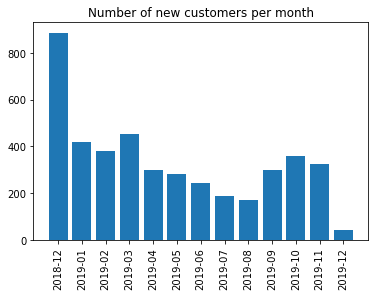

In [10]:
plt.bar(months, new_customer_counts)
plt.xticks(rotation = 90)
plt.title('Number of new customers per month')
plt.show()

<h3> Function for computing number of idle customers </h3>

In [57]:
def idle_customers(time_period):
    """
    Compute number of idle customers within time_period

    Arguments:
    
    time_period -- (start_date ('yyyy-mm-dd'), end_date('yyyy-mm-dd'))

    Returns:

    num_idle_customers, num_all_customers, num_idle_customers/num_all_customers
    
    """
    start_date, end_date = time_period

    # Customers who made a purchase within time_period
    purchasers = merged_table[(merged_table['invoice_date'] >= start_date) & (merged_table['invoice_date'] <= end_date)]['customer_id'].unique().tolist()

    # All existing customers within time_period
    existing = merged_table[(merged_table['invoice_date'] < end_date)]['customer_id'].unique().tolist()

    num_idle_customers = len(set(existing)) - len (set(purchasers))
    num_all_customers = len(set(existing))

    return num_idle_customers, num_all_customers, round (100 * num_idle_customers / num_all_customers, 2)


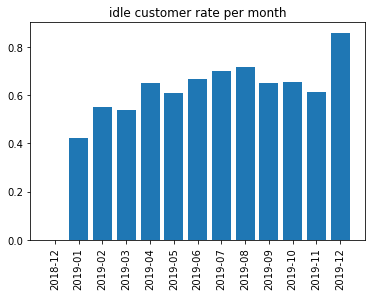

In [12]:
time_periods= [
                ('2018-12-01', '2018-12-31'),
                ('2019-01-01', '2019-01-31'),
                ('2019-02-01', '2019-02-31'),
                ('2019-03-01', '2019-03-31'),
                ('2019-04-01', '2019-04-31'),
                ('2019-05-01', '2019-05-31'),
                ('2019-06-01', '2019-06-31'),
                ('2019-07-01', '2019-07-31'),
                ('2019-08-01', '2019-08-31'),
                ('2019-09-01', '2019-09-31'),
                ('2019-10-01', '2019-10-31'),
                ('2019-11-01', '2019-11-31'),
                ('2019-12-01', '2019-12-31')
                ]

idle_customer_rates = []
for time_period in time_periods:
    idle_customer_rates.append(idle_customers(time_period)[2])

months = ['2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']

plt.bar(x = months, height = idle_customer_rates)
plt.xticks(rotation = 90)
plt.title('idle customer rate per month')
plt.show()

<h3> Function for computing purchase rate (# orders per day within time period) </h3>

In [13]:
def purchase_rate(time_period):

    """
    Compute number of idle customers within time_period

    Arguments:
    
    time_period -- (start_date ('yyyy-mm-dd'), end_date('yyyy-mm-dd'))

    Returns:

    purchase_rate (num_orders / num_days)
    
    """

    start_date, end_date = time_period

    temp_df = merged_table[(merged_table['invoice_date']>= start_date) & (merged_table['invoice_date']<= end_date)]
    num_invoices = len(temp_df['invoice_no'].unique())
    num_days = (datetime.strptime(end_date,'%Y-%m-%d') - datetime.strptime(start_date,'%Y-%m-%d')).days
    num_days
    purchase_rate = num_invoices/num_days
    return round(purchase_rate,2)
    

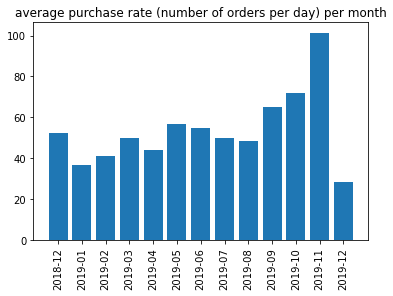

In [14]:
time_periods= [
                ('2018-12-01', '2018-12-31'),
                ('2019-01-01', '2019-01-31'),
                ('2019-02-01', '2019-02-28'),
                ('2019-03-01', '2019-03-31'),
                ('2019-04-01', '2019-04-30'),
                ('2019-05-01', '2019-05-31'),
                ('2019-06-01', '2019-06-30'),
                ('2019-07-01', '2019-07-31'),
                ('2019-08-01', '2019-08-31'),
                ('2019-09-01', '2019-09-30'),
                ('2019-10-01', '2019-10-31'),
                ('2019-11-01', '2019-11-30'),
                ('2019-12-01', '2019-12-31')
                ]

purchase_rates = []
for time_period in time_periods:
    purchase_rates.append(purchase_rate(time_period))

months = ['2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']

plt.bar(x = months, height = purchase_rates)
plt.xticks(rotation = 90)
plt.title('average purchase rate (number of orders per day) per month')
plt.show()

<h3> Average revenue per day (revenue per day within time period) </h3>

In [15]:
def average_revenue(time_period):

    """
    Compute average revenue per day within time_period

    Arguments:
    
    time_period -- (start_date ('yyyy-mm-dd'), end_date('yyyy-mm-dd'))

    Returns:

    average_revenue
    
    """

    start_date, end_date = time_period

    total_revenue = merged_table [(merged_table['invoice_date']>= start_date) & (merged_table['invoice_date']<= end_date)]['total_sale'].sum()
    num_days = (datetime.strptime(end_date,'%Y-%m-%d') - datetime.strptime(start_date,'%Y-%m-%d')).days
    average_revenue = total_revenue/num_days
    return average_revenue
    

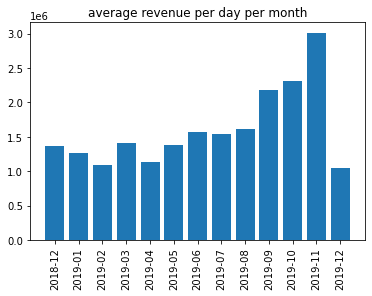

In [16]:
time_periods= [
                ('2018-12-01', '2018-12-31'),
                ('2019-01-01', '2019-01-31'),
                ('2019-02-01', '2019-02-28'),
                ('2019-03-01', '2019-03-31'),
                ('2019-04-01', '2019-04-30'),
                ('2019-05-01', '2019-05-31'),
                ('2019-06-01', '2019-06-30'),
                ('2019-07-01', '2019-07-31'),
                ('2019-08-01', '2019-08-31'),
                ('2019-09-01', '2019-09-30'),
                ('2019-10-01', '2019-10-31'),
                ('2019-11-01', '2019-11-30'),
                ('2019-12-01', '2019-12-31')
                ]

average_revenues = []
for time_period in time_periods:
    average_revenues.append(average_revenue(time_period))

months = ['2018-12','2019-01','2019-02','2019-03','2019-04','2019-05','2019-06','2019-07','2019-08','2019-09','2019-10','2019-11','2019-12']

plt.bar(x = months, height = average_revenues)
plt.xticks(rotation = 90)
plt.title('average revenue per day per month')
plt.show()


<h3> Number of orders per customer </h3> 

In [48]:
orders_per_customer = merged_table.groupby(['customer_id', 'country'])['invoice_no'].nunique().reset_index().sort_values(by = 'invoice_no', ascending = False)
orders_per_customer.rename(columns = {'invoice_no': 'num_orders'}, inplace = True)
orders_per_customer = orders_per_customer[orders_per_customer['customer_id'] != 'Null']
orders_per_customer.head()

,customer_id,country,num_orders
334,12748,Germany,211
1888,14911,Ireland,201
4019,17841,Germany,125
570,13089,Germany,98
1670,14606,Germany,92


In [51]:
# Excluding Germany

orders_per_customer[orders_per_customer['country']!= 'Germany'].head(20)

,customer_id,country,num_orders
1888,14911,Ireland,201
1698,14646,Netherlands,73
1342,14156,Ireland,55
185,12569,United Kingdom,32
281,12682,France,31
108,12471,United Kingdom,28
312,12720,United Kingdom,26
280,12681,France,22
231,12621,United Kingdom,21
57,12415,Australia,20


In [50]:
orders_per_customer.describe()

,num_orders
count,4347.000000
mean,4.271912
std,7.719016
min,1.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,211.000000


Median number of orders: 2 <br>
Mean: 4.27 <br>
Upper quartile: 5 orders or above <br>

<h5> For each customer, in each month, see percentage of existing customers who have not ordered in the last X time period </h5>

In [60]:
one_month_periods = [('2019-01-01', '2019-01-31'), ('2019-02-01', '2019-02-31'), ('2019-03-01', '2019-03-31'),
                    ('2019-04-01', '2019-04-31'), ('2019-05-01', '2019-05-31'), ('2019-06-01', '2019-06-31'), ('2019-07-01', '2019-07-31'),
                    ('2019-08-01', '2019-08-31'), ('2019-09-01', '2019-09-31'), ('2019-10-01', '2019-10-31'),('2019-11-01', '2019-11-31'),
                    ('2019-12-01', '2019-12-31')]
quarterly_periods = [('2019-01-01', '2019-03-31'), ('2019-04-01', '2019-06-30'),('2019-07-01', '2019-09-30'), ('2019-10-01', '2019-12-31') ]
six_month_periods = [('2019-01-01', '2019-06-30'), ('2019-07-01', '2019-12-31')]

monthly_idle = []
quarterly_idle = []
six_monthly_idle = []

for per in one_month_periods: 
    monthly_idle.append(idle_customers(per))

for per in quarterly_periods: 
    quarterly_idle.append(idle_customers(per))

for per in six_month_periods:
    six_monthly_idle.append(idle_customers(per))

monthly_idle, quarterly_idle, six_monthly_idle

([(541, 1283, 42.17),
  (924, 1683, 54.9),
  (1141, 2116, 53.92),
  (1580, 2435, 64.89),
  (1652, 2709, 60.98),
  (1969, 2961, 66.5),
  (2196, 3145, 69.83),
  (2378, 3313, 71.78),
  (2353, 3617, 65.05),
  (2602, 3966, 65.61),
  (2634, 4299, 61.27),
  (3724, 4340, 85.81)],
 [(339, 2116, 16.02),
  (963, 2955, 32.59),
  (1444, 3605, 40.06),
  (1778, 4340, 40.97)],
 [(230, 2955, 7.78), (972, 4340, 22.4)])

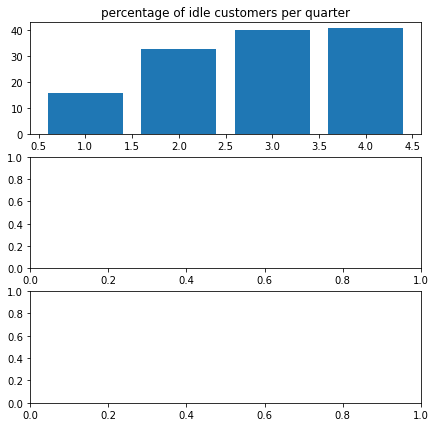

In [78]:
quarterly = [elem [2] for elem in quarterly_idle]
fig, ax = plt.subplots(3,1, figsize = (7,7))
ax[0].bar(list(range(1, len(quarterly_idle)+1)), quarterly)
ax[0].set_title('percentage of idle customers per quarter')

plt.show()


<h3> For each customer: average number of days since last purchase </h3>

<h3> Number of orders per country </h3>

In [21]:
merged_table.groupby('country')['invoice_no'].nunique().reset_index().sort_values(by = 'invoice_no', ascending = False)

,country,invoice_no
12,Germany,18709
34,United Kingdom,478
11,France,389
16,Ireland,288
3,Belgium,99
23,Netherlands,94
30,Spain,89
0,Australia,56
26,Portugal,56
32,Switzerland,50
